# WELCOME TO THE ANALYSIS OF UCE RESULTS FROM 2011 TO 2016
The key objectives in this data analysis include;
1. [Finding out the number of schools in every district.](#one)
2. [Determining the best  performing schools each year.](#two)
3. [Finding out the number of students sitting in every year.](#three)
4. [Getting the overall best performing schools overall the given years(2011-2016).](#four)
5. [Comparing the performance between girls and boys annually.](#five)
6. [Identifying the best performing districts annually.](#six)
7. [Studying the general performance of students as years progress.](#seven)
8. [Finding out the schools that have managed to maintain a good consistent performance.](#eight)
9. [Identify which regions in which the best performing schools are located.](#nine)
10. [Looking at the general performance of students within Kampala and Wakiso.](#ten)
11. [Comparing the performance between girls and boys in Kampala and Wakiso annually.](#eleven)
12. [Studying the performance of students outside of Kampala and Wakiso through the years.](#twelve)


## Let's view the initial organisation of the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from googlemaps import Client as GoogleMaps
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import MarkerCluster

In [2]:
df = pd.read_csv('UceResultsBySchool2011-2016.csv')
pd.set_option('display.max_columns', 48)
df

,YEAR,DISTRICT,SCHOOL,TOTAL CANDIDATES,TOTAL DIV 1,% DIV 1,TOTAL DIV 2,% DIV 2,TOTAL DIV 3,% DIV 3,TOTAL DIV 4,% DIV 4,TOTAL DIV 7,% DIV 7,TOTAL DIV 9,% DIV 9,TOTAL X,% X,FEMALE CANDIDATES,FEMALE TOTAL DIV1,FEMALE % DIV1,FEMALE TOTAL DIV2,FEMALE % DIV2,FEMALE TOTAL DIV3,FEMALE % DIV3,FEMALE TOTAL DIV4,FEMALE % DIV4,FEMALE TOTAL DIV7,FEMALE % DIV7,FEMALE TOTAL DIV9,FEMALE % DIV9,FEMALE TOTAL X,FEMALE % X,MALE CANDIDATES,MALE TOTAL DIV1,MALE % DIV1,MALE TOTAL DIV2,MALE % DIV2,MALE TOTAL DIV3,MALE % DIV3,MALE TOTAL DIV4,MALE % DIV4,MALE TOTAL DIV7,MALE % DIV7,MALE TOTAL DIV9,MALE % DIV9,MALE TOTAL X,MALE % X
0,2011,WAKISO,GAYAZA HIGH SCHOOL,176.0,175.0,99.4,1.0,0.6,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,176,175.0,99.4,1.0,0.6,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
1,2011,MUKONO,NAMILYANGO COLLEGE,151.0,150.0,99.3,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1.0,0.7,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,151,NaN,99.3,150.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.7
2,2011,MUKONO,"MT.ST.MARY'S,NAMAGUNGA",153.0,151.0,98.7,2.0,1.3,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,153,151.0,98.7,2.0,1.3,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
3,2011,WAKISO,"UGANDA MARTYRS SS,NAMUGONGO",222.0,216.0,97.3,6.0,2.7,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,113,107.0,94.7,6.0,5.3,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,109,NaN,100.0,109.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
4,2011,BUSHENYI MAIN,KITABI SEMINARY,73.0,71.0,97.3,2.0,2.7,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,73,NaN,97.3,71.0,2.7,2.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17634,2016,ZOMBO,PAIDHA SECONDARY SCHOOL P.O.BOX 117 PAIDHA,148.0,0.0,0.0,12.0,8.1,30.0,20.3,85.0,57.4,1.0,0.7,15.0,10.1,5.0,3.4,44,0.0,0.0,0.0,0.0,5.0,11.4,32.0,72.7,1.0,2.3,5.0,11.4,1.0,2.3,104,0.0,0.0,12.0,11.5,25.0,24.0,53.0,51.0,0.0,0.0,10.0,9.6,4.0,3.8
17635,2016,ZOMBO,PAKADHA SEED SECONDARY SCHOOL P.O.BOX 143 P...,68.0,0.0,0.0,2.0,2.9,11.0,16.2,50.0,73.5,0.0,0.0,5.0,7.4,0.0,0.0,28,0.0,0.0,1.0,3.6,4.0,14.3,21.0,75.0,0.0,0.0,2.0,7.1,0.0,0.0,40,0.0,0.0,1.0,2.5,7.0,17.5,29.0,72.5,0.0,0.0,3.0,7.5,0.0,0.0
17636,2016,ZOMBO,"CHARITY COLLEGE,PAIDHA P.O.BOX 47 PAIDHA",128.0,0.0,0.0,4.0,3.1,6.0,4.7,71.0,55.5,1.0,0.8,36.0,28.1,10.0,7.8,24,0.0,0.0,0.0,0.0,0.0,0.0,17.0,70.8,0.0,0.0,5.0,20.8,2.0,8.3,104,0.0,0.0,4.0,3.8,6.0,5.8,54.0,51.9,1.0,1.0,31.0,29.8,8.0,7.7
17637,2016,ZOMBO,NEGRINI MEM. SECONDARY SCHOOL P.O.BOX 156 P...,45.0,0.0,0.0,1.0,2.2,2.0,4.4,26.0,57.8,0.0,0.0,14.0,31.1,2.0,4.4,14,0.0,0.0,1.0,7.1,0.0,0.0,7.0,50.0,0.0,0.0,5.0,35.7,1.0,7.1,31,0.0,0.0,0.0,0.0,2.0,6.5,19.0,61.3,0.0,0.0,9.0,29.0,1.0,3.2


In [3]:
df.columns

Index(['YEAR', 'DISTRICT ', 'SCHOOL', 'TOTAL CANDIDATES', 'TOTAL DIV 1',
       '% DIV 1', 'TOTAL DIV 2', '% DIV 2', 'TOTAL DIV 3', '% DIV 3',
       'TOTAL DIV 4', '% DIV 4', 'TOTAL DIV 7', '% DIV 7', 'TOTAL DIV 9',
       '% DIV 9', 'TOTAL X', '% X', 'FEMALE CANDIDATES', 'FEMALE TOTAL DIV1 ',
       'FEMALE % DIV1 ', 'FEMALE TOTAL DIV2 ', 'FEMALE % DIV2',
       'FEMALE TOTAL DIV3', 'FEMALE % DIV3', 'FEMALE TOTAL DIV4',
       'FEMALE % DIV4', 'FEMALE TOTAL DIV7', 'FEMALE % DIV7',
       'FEMALE TOTAL DIV9', 'FEMALE % DIV9', 'FEMALE TOTAL X', 'FEMALE % X ',
       'MALE CANDIDATES', 'MALE TOTAL DIV1 ', 'MALE % DIV1 ',
       'MALE TOTAL DIV2 ', 'MALE % DIV2', 'MALE TOTAL DIV3', 'MALE % DIV3',
       'MALE TOTAL DIV4', 'MALE % DIV4 ', 'MALE TOTAL DIV7 ', 'MALE % DIV7',
       'MALE TOTAL DIV9 ', 'MALE % DIV9', 'MALE TOTAL X ', 'MALE % X'],
      dtype='object')

## Notice the whitespacing in some of the column names above, let's clean those up and also change the heading names to lower case for smoother analysis.

In [4]:
for dataset in df:
    df.columns = df.columns.map(str.lower)
    df.columns = df.columns.map(str.strip)

In [5]:
df.columns

Index(['year', 'district', 'school', 'total candidates', 'total div 1',
       '% div 1', 'total div 2', '% div 2', 'total div 3', '% div 3',
       'total div 4', '% div 4', 'total div 7', '% div 7', 'total div 9',
       '% div 9', 'total x', '% x', 'female candidates', 'female total div1',
       'female % div1', 'female total div2', 'female % div2',
       'female total div3', 'female % div3', 'female total div4',
       'female % div4', 'female total div7', 'female % div7',
       'female total div9', 'female % div9', 'female total x', 'female % x',
       'male candidates', 'male total div1', 'male % div1', 'male total div2',
       'male % div2', 'male total div3', 'male % div3', 'male total div4',
       'male % div4', 'male total div7', 'male % div7', 'male total div9',
       'male % div9', 'male total x', 'male % x'],
      dtype='object')

In [6]:
year_2011 = df.groupby('year')
year_2011.get_group(2011)

,year,district,school,total candidates,total div 1,% div 1,total div 2,% div 2,total div 3,% div 3,total div 4,% div 4,total div 7,% div 7,total div 9,% div 9,total x,% x,female candidates,female total div1,female % div1,female total div2,female % div2,female total div3,female % div3,female total div4,female % div4,female total div7,female % div7,female total div9,female % div9,female total x,female % x,male candidates,male total div1,male % div1,male total div2,male % div2,male total div3,male % div3,male total div4,male % div4,male total div7,male % div7,male total div9,male % div9,male total x,male % x
0,2011,WAKISO,GAYAZA HIGH SCHOOL,176.0,175.0,99.4,1.0,0.6,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,176,175.0,99.4,1.0,0.6,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
1,2011,MUKONO,NAMILYANGO COLLEGE,151.0,150.0,99.3,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1.0,0.7,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,151,NaN,99.3,150.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.7
2,2011,MUKONO,"MT.ST.MARY'S,NAMAGUNGA",153.0,151.0,98.7,2.0,1.3,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,153,151.0,98.7,2.0,1.3,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
3,2011,WAKISO,"UGANDA MARTYRS SS,NAMUGONGO",222.0,216.0,97.3,6.0,2.7,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,113,107.0,94.7,6.0,5.3,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,109,NaN,100.0,109.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
4,2011,BUSHENYI MAIN,KITABI SEMINARY,73.0,71.0,97.3,2.0,2.7,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,73,NaN,97.3,71.0,2.7,2.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,2011,KIRUHURA,KIKATSI SEED SECONDARY SCHOOL,27.0,NaN,0.0,4.0,14.8,13.0,48.1,10.0,37.0,NaN,0.0,NaN,0.0,NaN,0.0,11,NaN,0.0,2.0,18.2,4.0,36.4,5.0,45.5,NaN,0.0,NaN,0.0,NaN,0.0,16,NaN,0.0,NaN,12.5,2.0,56.3,9.0,31.3,5.0,0.0,NaN,0.0,NaN,0.0
2679,2011,KIRUHURA,KINONI COMMUNITY HIGH SCHOOL,80.0,NaN,0.0,7.0,8.8,15.0,18.8,43.0,53.8,NaN,0.0,8.0,10.0,7.0,8.8,42,NaN,0.0,2.0,4.8,6.0,14.3,25.0,59.5,NaN,0.0,4.0,9.5,5.0,11.9,38,NaN,0.0,NaN,13.2,5.0,23.7,9.0,47.4,18.0,0.0,NaN,10.5,4.0,5.3
2680,2011,KIRUHURA,LAKE MBURO SECONDARY SCHOOL,62.0,NaN,0.0,3.0,4.8,11.0,17.7,43.0,69.4,NaN,0.0,4.0,6.5,1.0,1.6,26,NaN,0.0,2.0,7.7,3.0,11.5,19.0,73.1,NaN,0.0,1.0,3.8,1.0,3.8,36,NaN,0.0,NaN,2.8,1.0,22.2,8.0,66.7,24.0,0.0,NaN,8.3,3.0,0.0
2681,2011,KIRUHURA,RWANYANGWE HIGH SCHOOL,27.0,NaN,0.0,5.0,18.5,6.0,22.2,16.0,59.3,NaN,0.0,NaN,0.0,NaN,0.0,14,NaN,0.0,1.0,7.1,4.0,28.6,9.0,64.3,NaN,0.0,NaN,0.0,NaN,0.0,13,NaN,0.0,NaN,30.8,4.0,15.4,2.0,53.8,7.0,0.0,NaN,0.0,NaN,0.0


## We also notice from above that for the year 2011, the arrangement of the males' results is improper, let's fix that by simply switching the data to the right columns

In [7]:
for x in df.index:
    if df.loc[x, 'year'] == 2011:
        df.loc[x, 'male total div1'] = df.loc[x, 'male total div2']
        df.loc[x, 'male total div2'] =  df.loc[x, 'male total div3']
        df.loc[x, 'male total div3'] =  df.loc[x, 'male total div4']
        df.loc[x, 'male total div4'] =  df.loc[x, 'male total div7']
        df.loc[x, 'male total div7'] = df.loc[x, 'male total div9']
        df.loc[x, 'male total div9'] =  df.loc[x, 'male total x']
       
df.loc[1, 'male total x'] = 1
df

,year,district,school,total candidates,total div 1,% div 1,total div 2,% div 2,total div 3,% div 3,total div 4,% div 4,total div 7,% div 7,total div 9,% div 9,total x,% x,female candidates,female total div1,female % div1,female total div2,female % div2,female total div3,female % div3,female total div4,female % div4,female total div7,female % div7,female total div9,female % div9,female total x,female % x,male candidates,male total div1,male % div1,male total div2,male % div2,male total div3,male % div3,male total div4,male % div4,male total div7,male % div7,male total div9,male % div9,male total x,male % x
0,2011,WAKISO,GAYAZA HIGH SCHOOL,176.0,175.0,99.4,1.0,0.6,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,176,175.0,99.4,1.0,0.6,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
1,2011,MUKONO,NAMILYANGO COLLEGE,151.0,150.0,99.3,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1.0,0.7,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,151,150.0,99.3,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1.0,0.7
2,2011,MUKONO,"MT.ST.MARY'S,NAMAGUNGA",153.0,151.0,98.7,2.0,1.3,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,153,151.0,98.7,2.0,1.3,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
3,2011,WAKISO,"UGANDA MARTYRS SS,NAMUGONGO",222.0,216.0,97.3,6.0,2.7,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,113,107.0,94.7,6.0,5.3,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,109,109.0,100.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
4,2011,BUSHENYI MAIN,KITABI SEMINARY,73.0,71.0,97.3,2.0,2.7,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,73,71.0,97.3,2.0,2.7,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17634,2016,ZOMBO,PAIDHA SECONDARY SCHOOL P.O.BOX 117 PAIDHA,148.0,0.0,0.0,12.0,8.1,30.0,20.3,85.0,57.4,1.0,0.7,15.0,10.1,5.0,3.4,44,0.0,0.0,0.0,0.0,5.0,11.4,32.0,72.7,1.0,2.3,5.0,11.4,1.0,2.3,104,0.0,0.0,12.0,11.5,25.0,24.0,53.0,51.0,0.0,0.0,10.0,9.6,4.0,3.8
17635,2016,ZOMBO,PAKADHA SEED SECONDARY SCHOOL P.O.BOX 143 P...,68.0,0.0,0.0,2.0,2.9,11.0,16.2,50.0,73.5,0.0,0.0,5.0,7.4,0.0,0.0,28,0.0,0.0,1.0,3.6,4.0,14.3,21.0,75.0,0.0,0.0,2.0,7.1,0.0,0.0,40,0.0,0.0,1.0,2.5,7.0,17.5,29.0,72.5,0.0,0.0,3.0,7.5,0.0,0.0
17636,2016,ZOMBO,"CHARITY COLLEGE,PAIDHA P.O.BOX 47 PAIDHA",128.0,0.0,0.0,4.0,3.1,6.0,4.7,71.0,55.5,1.0,0.8,36.0,28.1,10.0,7.8,24,0.0,0.0,0.0,0.0,0.0,0.0,17.0,70.8,0.0,0.0,5.0,20.8,2.0,8.3,104,0.0,0.0,4.0,3.8,6.0,5.8,54.0,51.9,1.0,1.0,31.0,29.8,8.0,7.7
17637,2016,ZOMBO,NEGRINI MEM. SECONDARY SCHOOL P.O.BOX 156 P...,45.0,0.0,0.0,1.0,2.2,2.0,4.4,26.0,57.8,0.0,0.0,14.0,31.1,2.0,4.4,14,0.0,0.0,1.0,7.1,0.0,0.0,7.0,50.0,0.0,0.0,5.0,35.7,1.0,7.1,31,0.0,0.0,0.0,0.0,2.0,6.5,19.0,61.3,0.0,0.0,9.0,29.0,1.0,3.2


## Let's get rid of the NaN values by replacing them with zeros. We are doing so because everywhere they are present, zeros are the appropriate values to replace them with.

In [8]:
df = df.fillna(0)
df

,year,district,school,total candidates,total div 1,% div 1,total div 2,% div 2,total div 3,% div 3,total div 4,% div 4,total div 7,% div 7,total div 9,% div 9,total x,% x,female candidates,female total div1,female % div1,female total div2,female % div2,female total div3,female % div3,female total div4,female % div4,female total div7,female % div7,female total div9,female % div9,female total x,female % x,male candidates,male total div1,male % div1,male total div2,male % div2,male total div3,male % div3,male total div4,male % div4,male total div7,male % div7,male total div9,male % div9,male total x,male % x
0,2011,WAKISO,GAYAZA HIGH SCHOOL,176.0,175.0,99.4,1.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176,175.0,99.4,1.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011,MUKONO,NAMILYANGO COLLEGE,151.0,150.0,99.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.7,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151,150.0,99.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.7
2,2011,MUKONO,"MT.ST.MARY'S,NAMAGUNGA",153.0,151.0,98.7,2.0,1.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153,151.0,98.7,2.0,1.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011,WAKISO,"UGANDA MARTYRS SS,NAMUGONGO",222.0,216.0,97.3,6.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113,107.0,94.7,6.0,5.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109,109.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011,BUSHENYI MAIN,KITABI SEMINARY,73.0,71.0,97.3,2.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73,71.0,97.3,2.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17634,2016,ZOMBO,PAIDHA SECONDARY SCHOOL P.O.BOX 117 PAIDHA,148.0,0.0,0.0,12.0,8.1,30.0,20.3,85.0,57.4,1.0,0.7,15.0,10.1,5.0,3.4,44,0.0,0.0,0.0,0.0,5.0,11.4,32.0,72.7,1.0,2.3,5.0,11.4,1.0,2.3,104,0.0,0.0,12.0,11.5,25.0,24.0,53.0,51.0,0.0,0.0,10.0,9.6,4.0,3.8
17635,2016,ZOMBO,PAKADHA SEED SECONDARY SCHOOL P.O.BOX 143 P...,68.0,0.0,0.0,2.0,2.9,11.0,16.2,50.0,73.5,0.0,0.0,5.0,7.4,0.0,0.0,28,0.0,0.0,1.0,3.6,4.0,14.3,21.0,75.0,0.0,0.0,2.0,7.1,0.0,0.0,40,0.0,0.0,1.0,2.5,7.0,17.5,29.0,72.5,0.0,0.0,3.0,7.5,0.0,0.0
17636,2016,ZOMBO,"CHARITY COLLEGE,PAIDHA P.O.BOX 47 PAIDHA",128.0,0.0,0.0,4.0,3.1,6.0,4.7,71.0,55.5,1.0,0.8,36.0,28.1,10.0,7.8,24,0.0,0.0,0.0,0.0,0.0,0.0,17.0,70.8,0.0,0.0,5.0,20.8,2.0,8.3,104,0.0,0.0,4.0,3.8,6.0,5.8,54.0,51.9,1.0,1.0,31.0,29.8,8.0,7.7
17637,2016,ZOMBO,NEGRINI MEM. SECONDARY SCHOOL P.O.BOX 156 P...,45.0,0.0,0.0,1.0,2.2,2.0,4.4,26.0,57.8,0.0,0.0,14.0,31.1,2.0,4.4,14,0.0,0.0,1.0,7.1,0.0,0.0,7.0,50.0,0.0,0.0,5.0,35.7,1.0,7.1,31,0.0,0.0,0.0,0.0,2.0,6.5,19.0,61.3,0.0,0.0,9.0,29.0,1.0,3.2


## **1. Finding out the number of schools in every district.**<a name="one"></a>
## Now let's  get 20 districts with the most schools in Uganda. 

In [9]:
year_grup = df.groupby(['year'])
year_2016 = year_grup.get_group(2016)
schoolNumber = year_2016['district'].value_counts().sum()
print('Total number of registered schools:', schoolNumber)
show = year_2016['district'].value_counts().head(20)
show

Total number of registered schools: 3256


WAKISO      352
KAMPALA     201
MUKONO      126
LUWEERO      89
KABALE       71
MBARARA      70
JINJA        67
KASESE       65
IGANGA       61
MPIGI        60
BUIKWE       60
MASAKA       57
ARUA         57
MITYANA      56
MBALE        53
BUSHENYI     52
TORORO       52
NTUNGAMO     51
RAKAI        50
KIBAALE      46
Name: district, dtype: int64

## **2. Determining the best  performing schools each year.**<a name="two"></a>
We are going to create a **score** column that aggregates the percentages of the different divisions, attaching different weights to each of them. The score ranges from 0 to 100. We shall use the function below to acheive that.

In [10]:
def score(x):
    return x['% div 1'] + x['% div 2']*0.5 + x['% div 3']/float(3) + x['% div 4']*0.25 + x['% div 7']/float(5) + x['% div 9']*0.1 + x['% x']*0.0
df['score'] = df.apply(score, axis=1)

Let's proceed to get the best performing schools per year.

In [11]:
df = df.round(1)
year_group = df.groupby('year')

We shall simplify data interactivity by storing the best school in a dictionary called **best_schools**.

In [12]:
best_schools = {}
for year, group in year_group:
    best_schools[year] = group[['school', 'score']].sort_values(by='score', ascending=False)

Displaying top ten in each year.

In [13]:
for year in best_schools:
    print(str(year)+"'s 10 best schools:")
    print(best_schools[year][:10].reset_index().drop('index', axis=1))
    print('\n')

2011's 10 best schools:
                               school  score
0                  GAYAZA HIGH SCHOOL   99.7
1              MT.ST.MARY'S,NAMAGUNGA   99.4
2                  NAMILYANGO COLLEGE   99.3
3         UGANDA MARTYRS SS,NAMUGONGO   98.6
4                     KITABI SEMINARY   98.6
5           ST.HENRY'S COLLEGE,KITOVU   98.5
6          NOTRE DAME ACADEMY,BUSEESA   98.0
7                 KING'S COLLEGE,BUDO   97.9
8           ST.JOSEPH'S GIRLS,NSAMBYA   97.6
9  ST.MARY'S SECONDARY SCHOOL,KITENDE   97.0


2012's 10 best schools:
                               school  score
0            ST.MARY'S COLLEGE,KISUBI   99.5
1              MT.ST.MARY'S,NAMAGUNGA   99.4
2         UGANDA MARTYRS SS,NAMUGONGO   98.6
3  ST.MARY'S SECONDARY SCHOOL,KITENDE   98.5
4                        NTARE SCHOOL   98.4
5                     KISUBI SEMINARY   97.9
6           ST.HENRY'S COLLEGE,KITOVU   97.9
7                  NAMILYANGO COLLEGE   97.2
8             NADIKET SEMINARY,MOROTO   96.6
9    

## 3. Finding out the number of students sitting in every year.<a name="three"></a>
We shall form a new dataframe called yt (yeartotalcandidates) which will hold all the years and total candidates sitting in each school. We then get the total candidates sitting each year and save them into y_t(year_totalcandidates) and switch the index to column, 'year'.

In [14]:
yt = df[['year', 'total candidates']]
y_t = yt.groupby('year')['total candidates'].sum().reset_index().sort_values(by=['total candidates'], ascending=[False])
y_t.set_index('year', inplace=True)
y_t

,total candidates
year,
2016,321276.0
2013,293435.0
2015,292263.0
2014,292097.0
2011,271848.0
2012,267817.0


## 4. Getting the overall best performing schools over all the given years(2011-2016).<a name="four"></a>
Firstly, we group our data by the schools and save in **df_schools**. This deals with grouping all the schools in all the years into one. From the grouping formed, we then find the mean of the score of all the schools and store this data in **overall_best** followed by displaying the top 20 schools gotten.

First of all in the output below, we display the results in the year 2016. In the second row we have St.Mary's Sec. School, Kitende, just a shortened form of St. Mary's Secondary School. If you were to go back to the best performing schools, you would see that in the other years, the school is referred to by the full form. So since we're considering all the years in this objective, we have to change the name in 2016 to it's full form. This is so the 2016 results are considered collectively with the previous years' results and not as if it was another school.

In [15]:
year_2016

,year,district,school,total candidates,total div 1,% div 1,total div 2,% div 2,total div 3,% div 3,total div 4,% div 4,total div 7,% div 7,total div 9,% div 9,total x,% x,female candidates,female total div1,female % div1,female total div2,female % div2,female total div3,female % div3,female total div4,female % div4,female total div7,female % div7,female total div9,female % div9,female total x,female % x,male candidates,male total div1,male % div1,male total div2,male % div2,male total div3,male % div3,male total div4,male % div4,male total div7,male % div7,male total div9,male % div9,male total x,male % x
14383,2016,WAKISO,"THE ACADEMY ST.LAWRENCE,BUDO P.O.BOX 29142 ...",20.0,20.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,7.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,13.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14384,2016,WAKISO,"ST.MARY'S SEC. SCHOOL,KITENDE P.O.BOX 30583...",433.0,430.0,99.3,2.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.2,166,163.0,98.2,2.0,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.6,267,267.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14385,2016,WAKISO,"UGANDA MARTYRS SS,NAMUGONGO P.O.BOX 5369 KA...",266.0,260.0,97.7,6.0,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136,132.0,97.1,4.0,2.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130,128.0,98.5,2.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14386,2016,MUKONO,"MT.ST.MARY'S,NAMAGUNGA P.O.BOX 18 LUGAZI",160.0,154.0,96.3,6.0,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160,154.0,96.3,6.0,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14387,2016,WAKISO,GAYAZA HIGH SCHOOL P.O.BOX 7029 KAMPALA,195.0,187.0,95.9,8.0,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195,187.0,95.9,8.0,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17634,2016,ZOMBO,PAIDHA SECONDARY SCHOOL P.O.BOX 117 PAIDHA,148.0,0.0,0.0,12.0,8.1,30.0,20.3,85.0,57.4,1.0,0.7,15.0,10.1,5.0,3.4,44,0.0,0.0,0.0,0.0,5.0,11.4,32.0,72.7,1.0,2.3,5.0,11.4,1.0,2.3,104,0.0,0.0,12.0,11.5,25.0,24.0,53.0,51.0,0.0,0.0,10.0,9.6,4.0,3.8
17635,2016,ZOMBO,PAKADHA SEED SECONDARY SCHOOL P.O.BOX 143 P...,68.0,0.0,0.0,2.0,2.9,11.0,16.2,50.0,73.5,0.0,0.0,5.0,7.4,0.0,0.0,28,0.0,0.0,1.0,3.6,4.0,14.3,21.0,75.0,0.0,0.0,2.0,7.1,0.0,0.0,40,0.0,0.0,1.0,2.5,7.0,17.5,29.0,72.5,0.0,0.0,3.0,7.5,0.0,0.0
17636,2016,ZOMBO,"CHARITY COLLEGE,PAIDHA P.O.BOX 47 PAIDHA",128.0,0.0,0.0,4.0,3.1,6.0,4.7,71.0,55.5,1.0,0.8,36.0,28.1,10.0,7.8,24,0.0,0.0,0.0,0.0,0.0,0.0,17.0,70.8,0.0,0.0,5.0,20.8,2.0,8.3,104,0.0,0.0,4.0,3.8,6.0,5.8,54.0,51.9,1.0,1.0,31.0,29.8,8.0,7.7
17637,2016,ZOMBO,NEGRINI MEM. SECONDARY SCHOOL P.O.BOX 156 P...,45.0,0.0,0.0,1.0,2.2,2.0,4.4,26.0,57.8,0.0,0.0,14.0,31.1,2.0,4.4,14,0.0,0.0,1.0,7.1,0.0,0.0,7.0,50.0,0.0,0.0,5.0,35.7,1.0,7.1,31,0.0,0.0,0.0,0.0,2.0,6.5,19.0,61.3,0.0,0.0,9.0,29.0,1.0,3.2


In [16]:
df.loc[14384, 'school'] = "ST.MARY'S SECONDARY SCHOOL,KITENDE"
df.loc[14384, 'school']

"ST.MARY'S SECONDARY SCHOOL,KITENDE"

In [17]:
df_schools = df.groupby(['school', 'district'])
overall_best = df_schools['score'].mean()
overall_best = overall_best.sort_values(ascending=False).reset_index()
overall_best[:20].round(1)

,school,district,score
0,"THE ACADEMY ST.LAWRENCE,BUDO P.O.BOX 29142 ...",WAKISO,100.0
1,"MT.ST.MARY'S,NAMAGUNGA",MUKONO,99.4
2,"UGANDA MARTYRS SS,NAMUGONGO P.O.BOX 5369 KA...",WAKISO,98.9
3,"ST.MARY'S SECONDARY SCHOOL,KITENDE",WAKISO,98.9
4,"UGANDA MARTYRS SS,NAMUGONGO",WAKISO,98.8
5,"MT.ST.MARY'S,NAMAGUNGA P.O.BOX 18 LUGAZI",MUKONO,98.2
6,GAYAZA HIGH SCHOOL P.O.BOX 7029 KAMPALA,WAKISO,98.0
7,"NOTRE DAME ACADEMY,BUSEESA P.O.BOX 77 KARUG...",KIBAALE,97.8
8,NAMILYANGO COLLEGE P.O.BOX 7091 KAMPALA,MUKONO,97.6
9,BUKALASA MINOR SEMINARY P.O.BOX 106 MASAKA,KALUNGU,97.3


### From above, we notice we have some duplicates but these cannot be removed by the **drop_duplicates()** function because they are unique. They are unique beacuse of the box office numbers attached to them. To take out these duplicates, we shall have to remove the box office numbers from them and then apply the **drop_duplicates()** method.

Function to remove P.O.BOX that makes duplicates unique.

In [18]:
def cut_word(x):
    cut = 'P.O.BOX'
    new_guy = []
    m = str(x).split()
    for word in m:
        if word != cut:
            new_guy.append(word)
        else:
            break
    n = ' '.join(new_guy)
    return n.strip()

Now lets apply the function and finally drop the duplicates. We shall then clearly see our top 20 schools over all the years.

In [19]:
overall_best['school'] = overall_best['school'].apply(cut_word)
overall_best.drop_duplicates('school', inplace=True)
overall_best = overall_best[:50].round(1)
overall_best[:20]

,school,district,score
0,"THE ACADEMY ST.LAWRENCE,BUDO",WAKISO,100.0
1,"MT.ST.MARY'S,NAMAGUNGA",MUKONO,99.4
2,"UGANDA MARTYRS SS,NAMUGONGO",WAKISO,98.9
3,"ST.MARY'S SECONDARY SCHOOL,KITENDE",WAKISO,98.9
6,GAYAZA HIGH SCHOOL,WAKISO,98.0
7,"NOTRE DAME ACADEMY,BUSEESA",KIBAALE,97.8
8,NAMILYANGO COLLEGE,MUKONO,97.6
9,BUKALASA MINOR SEMINARY,KALUNGU,97.3
10,LONDON COLLEGE OF ST.LAWRENCE,WAKISO,97.2
11,TURKISH LIGHT ACADEMY,WAKISO,97.0


## 5. Comparing the performance between girls and boys annually.<a name="five"></a>
We are going to create a **male_scores** and **female_scores** column that aggregates the percentages of the different divisions of both males and females, attaching different weights to each of them. They both range from 0 to 100. We shall use the functions below to achieve that.

In [20]:
def male_scores(x):
    return x['male % div1'] + x['male % div2']*0.5 + x['male % div3']/float(3) + x['male % div4']*0.25 + x['male % div7']/float(5) + x['male % div9']*0.1 + x['male % x']*0

def female_scores(x):
    return x['female % div1'] + x['female % div2']*0.5 + x['female % div3']/float(3) + x['female % div4']*0.25 + x['female % div7']/float(5) + x['female % div9']*0.1 + x['female % x']*0

Applying the above functions.

In [21]:
df['male_scores'] = df.apply(male_scores, axis = 1)
df['female_scores'] = df.apply(female_scores, axis = 1)

Below are the aggregated percentages grouped by every year.

In [22]:
gender_avg_by_year = df.groupby('year')[['male_scores', 'female_scores']].mean()
gender_avg_by_year

,male_scores,female_scores
year,,
2011,35.538136,31.408561
2012,32.243787,28.797616
2013,32.386167,28.911967
2014,33.234133,29.748903
2015,34.180714,30.461535
2016,32.188525,28.474419


A graphical representation of the above data.

Text(0.5, 1.0, 'Comparison between performance of girls and boys in UCE 2011-2016')

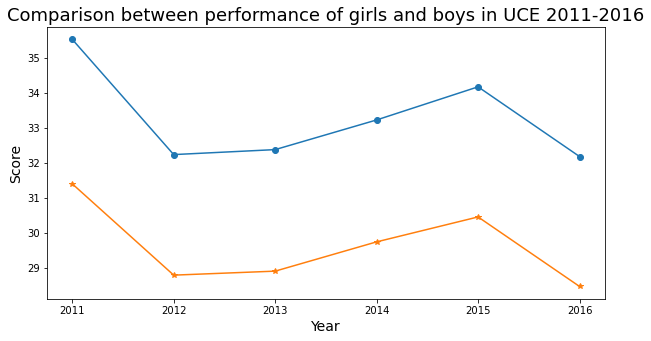

In [23]:
f, ax = plt.subplots(figsize=(10,5))
gender_avg_by_year['male_scores'].plot(marker = 'o')

gender_avg_by_year['female_scores'].plot(marker = '*')


plt.xlabel('Year', fontsize=14)
plt.ylabel('Score', fontsize=14)

plt.title('Comparison between performance of girls and boys in UCE 2011-2016', fontsize=18)

From above, we notice that the boys always perform better than the girls over the years. Boys are represented with blue and girls with orange.



## 6. Identifying the best performing districts in the period 2011-2016<a name="six"></a>
We shall make a grouping by the districts and then apply the mean function to the scores to help us rank the districts. 

In the cell below, the dataframe that has the score column(from objective 2) is called and a grouping by district is performed. The grouping therefore cuts through the years. For each of the grouped values, the mean function is used to get its average from all its values in the score column.

In [24]:
district_avg = df.groupby('district')['score'].mean()
pd.set_option('display.max_rows', 120)
district_avg

district
ABIM             30.566667
ADJUMANI         26.989744
AGAGO            30.437500
ALEBTONG         29.705556
AMOLATAR         26.275000
AMUDAT           27.050000
AMURIA           27.624000
AMURU            35.163636
APAC             30.510390
ARUA             30.613497
BUDAKA           30.003448
BUDUDA           25.840741
BUGIRI           23.460656
BUGIRI MAIN      25.570000
BUHWEJU          29.306250
BUIKWE           34.499399
BUKEDEA          27.556250
BUKOMANSIMBI     32.027778
BUKWO            23.682979
BULAMBULI        24.912281
BULIISA          28.921429
BUNDIBUGYO       25.115942
BUSHENYI         33.579870
BUSHENYI MAIN    41.506422
BUSIA            26.285276
BUTALEJA         27.488172
BUTAMBALA        34.322835
BUVUMA           31.991667
BUYENDE          25.253086
DOKOLO           29.672222
GOMBA            27.329630
GULU             32.002646
HOIMA            32.768908
IBANDA           32.852850
IGANGA           28.993656
ISINGIRO         31.099435
JINJA            33

Below, the list of the districts is then sorted in descending order to get the districts with the highest mean score. Take note that the mean score here is for all the schools within a district for all the years. So Moroto emerging best here with an average of 47.35 means that was the average performance for all the schools within the district for the period 2011-2016.

In [25]:
rank = district_avg.sort_values(ascending = False)
rank

district
MOROTO           47.353333
BUSHENYI MAIN    41.506422
KOLE             40.896364
MUKONO           40.183949
KALUNGU          39.789385
WAKISO           39.466909
OTUKE            39.312000
KAMPALA          38.064416
MPIGI            37.074018
RUBIRIZI         36.580882
KOTIDO MAIN      36.460000
MBARARA          35.981053
SHEEMA           35.967500
AMURU            35.163636
LUWERO           35.000243
SOROTI           34.594643
LIRA             34.566087
NAPAK            34.555556
BUIKWE           34.499399
NTUNGAMO         34.412014
MASAKA MAIN      34.388930
BUTAMBALA        34.322835
LUWEERO          34.220225
PADER            34.171429
LYANTONDE        34.169444
RUKUNGIRI        34.123256
KIRYANDONGO      34.061000
RAKAI            34.032796
KABALE           33.998705
JINJA            33.919251
MASAKA           33.894737
KOTIDO           33.650000
MASINDI          33.628030
BUSHENYI         33.579870
KAYUNGA          33.085500
IBANDA           32.852850
HOIMA            32

This is a list of 10 best performing districts for the years 2011-2016.

In [26]:
rank.head(10)

district
MOROTO           47.353333
BUSHENYI MAIN    41.506422
KOLE             40.896364
MUKONO           40.183949
KALUNGU          39.789385
WAKISO           39.466909
OTUKE            39.312000
KAMPALA          38.064416
MPIGI            37.074018
RUBIRIZI         36.580882
Name: score, dtype: float64

## 7. Studying the general performance of students as years progress.<a name="seven"></a>
We shall make a grouping by the years and find the sum for all divisions in all the years.

In [27]:
a = df.groupby('year')[['total div 1', 'total div 2', 'total div 3', 'total div 4', 'total div 7', 'total div 9', 'total x']].sum()
a.reset_index(inplace = True)
a

,year,total div 1,total div 2,total div 3,total div 4,total div 7,total div 9,total x
0,2011,22651.0,48510.0,67740.0,115573.0,1171.0,9916.0,6287.0
1,2012,18852.0,43413.0,66613.0,119756.0,995.0,12287.0,5901.0
2,2013,19951.0,43581.0,59933.0,139379.0,1254.0,22656.0,6681.0
3,2014,23034.0,44676.0,63072.0,138265.0,1059.0,18007.0,3984.0
4,2015,25081.0,46583.0,66637.0,121093.0,1348.0,25265.0,6256.0
5,2016,23489.0,44307.0,63072.0,142467.0,961.0,40463.0,6517.0


In [28]:
b = df.groupby('year')['total candidates'].sum()
b

year
2011    271848.0
2012    267817.0
2013    293435.0
2014    292097.0
2015    292263.0
2016    321276.0
Name: total candidates, dtype: float64

Right above, we have obtained the total candidates who sat in each year.

We shall then obtain the division percentages in relation to the total number of candidates that sat each year.

In [29]:
for ind in a.index:
    if a.loc[ind, 'year'] == b.index[ind]:
        a.loc[ind, 'total div 1'] = (a.loc[ind, 'total div 1']/b[b.index[ind]])*100
        a.loc[ind, 'total div 2'] = (a.loc[ind, 'total div 2']/b[b.index[ind]])*100
        a.loc[ind, 'total div 3'] = (a.loc[ind, 'total div 3']/b[b.index[ind]])*100
        a.loc[ind, 'total div 4'] = (a.loc[ind, 'total div 4']/b[b.index[ind]])*100
        a.loc[ind, 'total div 7'] = (a.loc[ind, 'total div 7']/b[b.index[ind]])*100
        a.loc[ind, 'total div 9'] = (a.loc[ind, 'total div 9']/b[b.index[ind]])*100
        a.loc[ind, 'total x'] = (a.loc[ind, 'total x']/b[b.index[ind]])*100
a

,year,total div 1,total div 2,total div 3,total div 4,total div 7,total div 9,total x
0,2011,8.332230,17.844531,24.918337,42.513831,0.430755,3.647627,2.312689
1,2012,7.039135,16.209949,24.872581,44.715608,0.371522,4.587834,2.203370
2,2013,6.799121,14.852012,20.424626,47.499105,0.427352,7.720960,2.276825
3,2014,7.885737,15.294919,21.592827,47.335303,0.362551,6.164733,1.363930
4,2015,8.581654,15.938726,22.800354,41.432888,0.461228,8.644611,2.140538
5,2016,7.311159,13.790946,19.631719,44.344115,0.299120,12.594467,2.028474


A graphical representation of the above data.

Text(0.5, 1.0, 'GENERAL PERFORMANCE OF STUDENTS ANNUALLY')

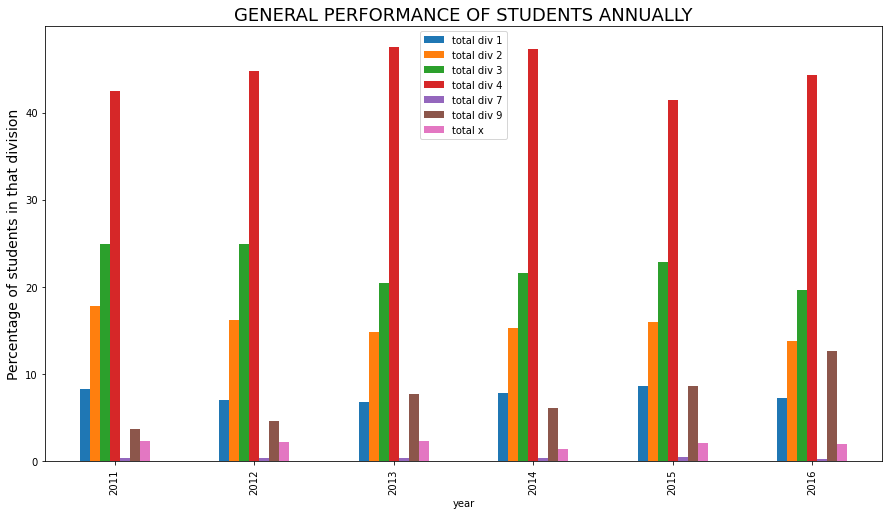

In [30]:
a.set_index(['year'] , inplace = True)
ax = a.plot(kind='bar', figsize=(15,8))
plt.ylabel('Percentage of students in that division', fontsize=14)
ax.set_title('GENERAL PERFORMANCE OF STUDENTS ANNUALLY', fontsize=18)

Below, we display the performances annually in the various categories of divisions.

Text(0.5, 1.0, 'DIVISION ONES ANNUALLY')

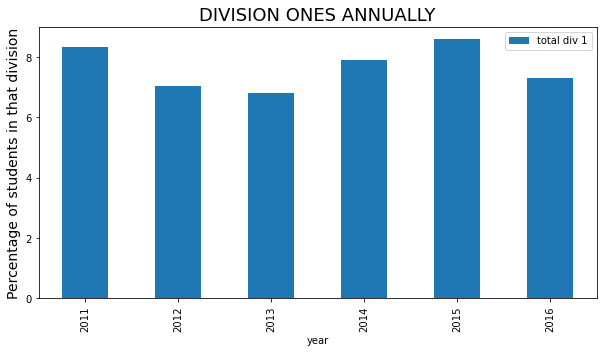

In [31]:
ax = a.plot( y = 'total div 1', kind = 'bar', figsize=(10,5))
plt.ylabel('Percentage of students in that division', fontsize=14)
ax.set_title('DIVISION ONES ANNUALLY', fontsize=18)

Text(0.5, 1.0, 'DIVISION TWOS ANNUALLY')

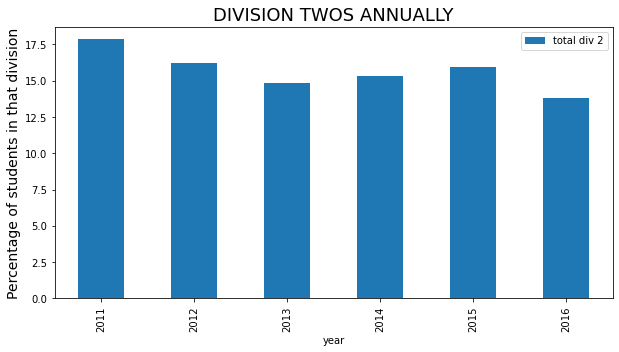

In [32]:
ax = a.plot( y = 'total div 2', kind = 'bar', figsize=(10,5) )
plt.ylabel('Percentage of students in that division', fontsize=14)
ax.set_title('DIVISION TWOS ANNUALLY', fontsize=18)

Text(0.5, 1.0, 'DIVISION THREES ANNUALLY')

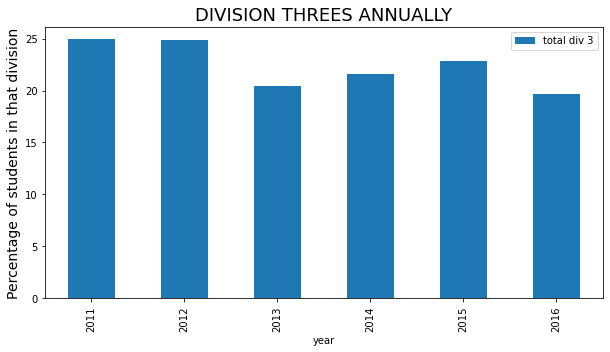

In [33]:
ax = a.plot( y = 'total div 3', kind = 'bar', figsize=(10, 5) )
plt.ylabel('Percentage of students in that division', fontsize=14)
ax.set_title('DIVISION THREES ANNUALLY', fontsize=18)

Text(0.5, 1.0, 'DIVISION FOURS ANNUALLY')

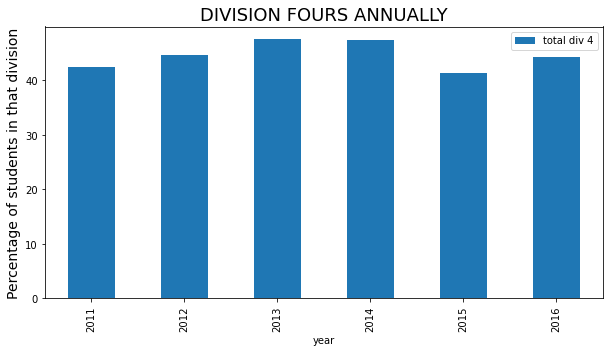

In [34]:
ax = a.plot( y = 'total div 4', kind = 'bar', figsize=(10,5) )
plt.ylabel('Percentage of students in that division', fontsize=14)
ax.set_title('DIVISION FOURS ANNUALLY', fontsize=18)

Text(0.5, 1.0, 'DIVISION SEVENS ANNUALLY')

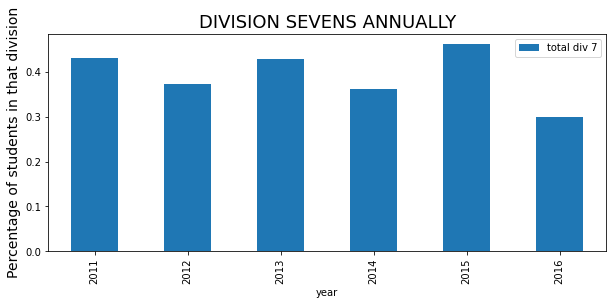

In [35]:
ax = a.plot( y = 'total div 7', kind = 'bar', figsize=(10,4) )
plt.ylabel('Percentage of students in that division', fontsize=14)
ax.set_title('DIVISION SEVENS ANNUALLY', fontsize=18)

Text(0.5, 1.0, 'DIVISION NINES ANNUALLY')

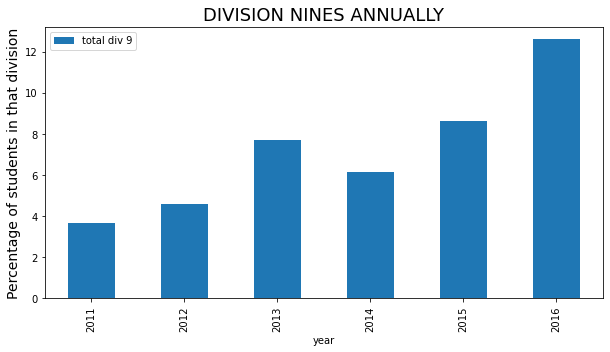

In [36]:
ax = a.plot( y = 'total div 9', kind = 'bar', figsize=(10,5) )
plt.ylabel('Percentage of students in that division', fontsize=14)
ax.set_title('DIVISION NINES ANNUALLY', fontsize=18)

Text(0.5, 1.0, 'Xs ANNUALLY')

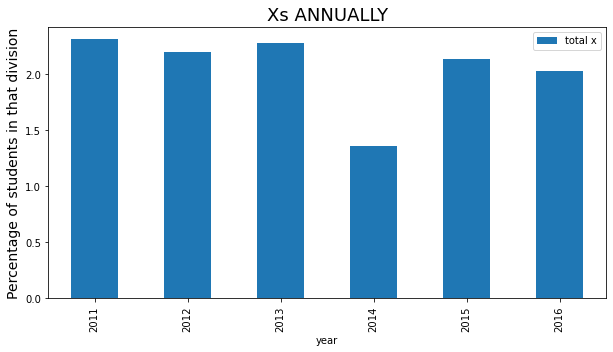

In [37]:
ax = a.plot( y = 'total x', kind = 'bar', figsize=(10,5) )
plt.ylabel('Percentage of students in that division', fontsize=14)
ax.set_title('Xs ANNUALLY', fontsize=18)

After studying the individual Divisions, we can then collectively analyse them all and be able to rank the years against each other, thus getting worst and best. We just apply a weighting function to the dataframe holding performance division-wise in all the years. 

In [38]:
def score(x):
    return x['total div 1'] + x['total div 2']*0.5 + x['total div 3']/float(3) + x['total div 4']*0.25 + x['total div 7']/float(5) + x['total div 9']*0.1 + x['total x']*0.0

a['score'] = a.apply(score, axis=1)
a = a.sort_values(by='score', ascending = False)
a

,total div 1,total div 2,total div 3,total div 4,total div 7,total div 9,total x,score
year,,,,,,,,
2011,8.332230,17.844531,24.918337,42.513831,0.430755,3.647627,2.312689,36.639979
2015,8.581654,15.938726,22.800354,41.432888,0.461228,8.644611,2.140538,35.466064
2014,7.885737,15.294919,21.592827,47.335303,0.362551,6.164733,1.363930,35.253614
2012,7.039135,16.209949,24.872581,44.715608,0.371522,4.587834,2.203370,35.146960
2013,6.799121,14.852012,20.424626,47.499105,0.427352,7.720960,2.276825,33.765678
2016,7.311159,13.790946,19.631719,44.344115,0.299120,12.594467,2.028474,33.155838


## 8. Finding out the schools that have managed to maintain a good consistent performance.<a name="eight"></a>
From the dictionary of **best_schools** we generated, we shall apply our **cut_word** method to make it possible to get common schools in all the years from the dictionary. Applying the method helps make unique duplicates normal since getting the common schools over the years is based off the idea of duplicates over all the years.

In [39]:
for year in best_schools:
    best_schools[year]['school']=best_schools[year]['school'].apply(cut_word)

Let us consider the top 100 schools from the dictionary.

In [40]:
best=[]
for year in best_schools:
    best.append(set(best_schools[year][:100].school.tolist()))
constant_best = list(set.intersection(*(best)))
constant_best

['GOMBE SECONDARY SCHOOL',
 'MENGO SECONDARY SCHOOL',
 'SEETA HIGH SCHOOL',
 'NOTRE DAME ACADEMY,BUSEESA',
 'NADIKET SEMINARY,MOROTO',
 'SEETA HIGH SCHOOL,MUKONO',
 "ST.JOSEPH'S GIRLS,NSAMBYA",
 "NABISUNSA GIRLS' SCHOOL",
 'MBARARA HIGH SCHOOL',
 "BWERANYANGI GIRLS' SCHOOL",
 "ST.HENRY'S COLLEGE,KITOVU",
 "KING'S COLLEGE,BUDO",
 'ST.JOSEPH OF NAZARETH H/S',
 "TORORO GIRLS' SCHOOL",
 'NTARE SCHOOL',
 'TURKISH LIGHT ACADEMY',
 'NAMILYANGO COLLEGE',
 'TRINITY COLLEGE,NABBINGO',
 'NDEJJE SECONDARY SCHOOL',
 'ST.CHARLES LWANGA SEMINARY',
 'MERRYLAND HIGH SCHOOL,ENTEBBE',
 'BUKALASA MINOR SEMINARY',
 'UGANDA MARTYRS SS,NAMUGONGO',
 'LONDON COLLEGE OF ST.LAWRENCE',
 'KISUBI SEMINARY',
 "ST.PAUL'S SEMINARY,KABALE",
 "ST.MARY'S COLLEGE,KISUBI",
 'JINJA COLLEGE',
 'GAYAZA HIGH SCHOOL',
 'KITABI SEMINARY',
 'KIIRA COLLEGE,BUTIKI',
 'MAKERERE COLLEGE SCHOOL',
 'IGANGA SECONDARY SCHOOL',
 'BRILLIANT HIGH SCHOOL,KAWEMPE',
 'IMMACULATE HEART GIRLS SCHOOL',
 'MARYHILL HIGH SCHOOL',
 "MT.ST.MARY'S,NAMA

From above, we see that only 37 schools appear. These are the only schools that appear each year among the top 100.

Below, we shall see which districts in which they are located.

In [41]:
indexer =[]
df2015 = df[df['year']==2015]
for school in constant_best:
    i = df2015[df2015['school']== school][['school', 'district']].index.values.tolist()
    indexer = indexer + i

constant_best_df = df2015.loc[indexer][['school', 'district']]
constant_best_df

,school,district
11525,GOMBE SECONDARY SCHOOL,BUTAMBALA
11522,MENGO SECONDARY SCHOOL,KAMPALA
11471,SEETA HIGH SCHOOL,MUKONO
11464,"NOTRE DAME ACADEMY,BUSEESA",KIBAALE
11489,"NADIKET SEMINARY,MOROTO",MOROTO
11465,"SEETA HIGH SCHOOL,MUKONO",MUKONO
11467,"ST.JOSEPH'S GIRLS,NSAMBYA",KAMPALA
11478,NABISUNSA GIRLS' SCHOOL,KAMPALA
11508,MBARARA HIGH SCHOOL,MBARARA
11505,BWERANYANGI GIRLS' SCHOOL,BUSHENYI MAIN


## 9. Identifying the regions in which the best performing schools are located.<a name="nine"></a>
Considering the over all best performing schools over all the years, let us graphically find out where they are located in Uganda.

In [42]:
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 
longitude = [] 
latitude = []
def findGeocode(city): 
     try: 
        geolocator = Nominatim(user_agent="your_app_name")  
        return geolocator.geocode(city) 
     except GeocoderTimedOut: 
        return findGeocode(city)
    
for i in (overall_best['district']): 
    if findGeocode(i) != None: 
        loc = findGeocode(i) 
        latitude.append(loc.latitude) 
        longitude.append(loc.longitude) 
    else: 
        latitude.append(np.nan) 
        longitude.append(np.nan) 
  

In [43]:
overall_best["Longitude"] = longitude 
overall_best["Latitude"] = latitude 
  
overall_best

,school,district,score,Longitude,Latitude
0,"THE ACADEMY ST.LAWRENCE,BUDO",WAKISO,100.0,32.511871,0.216967
1,"MT.ST.MARY'S,NAMAGUNGA",MUKONO,99.4,32.726256,-0.052324
2,"UGANDA MARTYRS SS,NAMUGONGO",WAKISO,98.9,32.511871,0.216967
3,"ST.MARY'S SECONDARY SCHOOL,KITENDE",WAKISO,98.9,32.511871,0.216967
6,GAYAZA HIGH SCHOOL,WAKISO,98.0,32.511871,0.216967
7,"NOTRE DAME ACADEMY,BUSEESA",KIBAALE,97.8,31.002729,0.927686
8,NAMILYANGO COLLEGE,MUKONO,97.6,32.726256,-0.052324
9,BUKALASA MINOR SEMINARY,KALUNGU,97.3,31.810487,-0.097389
10,LONDON COLLEGE OF ST.LAWRENCE,WAKISO,97.2,32.511871,0.216967
11,TURKISH LIGHT ACADEMY,WAKISO,97.0,32.511871,0.216967


What we have done above is simply attach coordinates to each school's location so we can represent it on the map below.

In [44]:
map_ug2 = folium.Map(location=[1.373333, 32.290275], zoom_start=7)
for idx, row in overall_best.iterrows():
    location = [row['Latitude'],row['Longitude']]
    popup = [row['school']]
    folium.Marker(location, popup).add_to(map_ug2)
map_ug2

From the above representation, we can see that most of the best performing schools are located in the central region as suspected.

## 10. Looking at the general performance of students within Kampala and Wakiso.<a name="ten"></a>
We consider Kampale and Wakiso since they are the two top districts with the most best performing schools which is evident below.

In [45]:
best_districts = constant_best_df['district'].value_counts()
best_districts

WAKISO           10
MUKONO            4
KAMPALA           4
MBARARA           3
BUSHENYI MAIN     2
RUKUNGIRI         2
JINJA             2
IGANGA            1
MOROTO            1
KABALE            1
TORORO            1
KALUNGU           1
LUWERO            1
BUTAMBALA         1
MASAKA MAIN       1
MPIGI             1
KIBAALE           1
Name: district, dtype: int64

Below is a data frame of schools located only in Kampala and Wakiso.

In [46]:
kla = df[df['district'] == 'KAMPALA']
wakiso = df[df['district'] == 'WAKISO']
kla_wakiso = kla.append(wakiso)
kla_wakiso

,year,district,school,total candidates,total div 1,% div 1,total div 2,% div 2,total div 3,% div 3,total div 4,% div 4,total div 7,% div 7,total div 9,% div 9,total x,% x,female candidates,female total div1,female % div1,female total div2,female % div2,female total div3,...,female total div7,female % div7,female total div9,female % div9,female total x,female % x,male candidates,male total div1,male % div1,male total div2,male % div2,male total div3,male % div3,male total div4,male % div4,male total div7,male % div7,male total div9,male % div9,male total x,male % x,score,male_scores,female_scores
8,2011,KAMPALA,"ST.JOSEPH'S GIRLS,NSAMBYA",192.0,183.0,95.3,9.0,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,192,183.0,95.3,9.0,4.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.6,0.000000,97.650000
20,2011,KAMPALA,NABISUNSA GIRLS' SCHOOL,202.0,173.0,85.6,26.0,12.9,3.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202,173.0,85.6,26.0,12.9,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.6,0.000000,92.550000
25,2011,KAMPALA,KIBULI SECONDARY SCHOOL,262.0,219.0,83.6,35.0,13.4,5.0,1.9,2.0,0.8,0.0,0.0,0.0,0.0,1.0,0.4,90,69.0,76.7,17.0,18.9,3.0,...,0.0,0.0,0.0,0.0,1.0,1.1,172,150.0,87.2,18.0,10.5,2.0,1.2,2.0,1.2,0.0,0.0,0.0,0.0,0.0,0.0,91.1,93.150000,87.250000
27,2011,KAMPALA,KAWEMPE MUSLIM SECONDARY SCHOOL,193.0,159.0,82.4,33.0,17.1,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87,69.0,79.3,17.0,19.5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,106,90.0,84.9,16.0,15.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.1,92.450000,89.416667
36,2011,KAMPALA,BP.CIPRIANO KIHANGIRE SECONDARY SCHOOL,242.0,171.0,70.7,65.0,26.9,5.0,2.1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.4,112,74.0,66.1,35.0,31.3,2.0,...,0.0,0.0,0.0,0.0,1.0,0.9,130,97.0,74.6,30.0,23.1,3.0,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.9,86.916667,82.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17615,2016,WAKISO,"BRIXTON SECONDARY SCHOOL,WATTUBA P.O.BOX 63...",30.0,0.0,0.0,1.0,3.3,5.0,16.7,16.0,53.3,0.0,0.0,5.0,16.7,3.0,10.0,18,0.0,0.0,1.0,5.6,5.0,...,0.0,0.0,2.0,11.1,2.0,11.1,12,0.0,0.0,0.0,0.0,0.0,0.0,8.0,66.7,0.0,0.0,3.0,25.0,1.0,8.3,22.2,19.175000,24.276667
17616,2016,WAKISO,"AIRFIELD HIGH SCHOOL,KAJJANSI P.O.BOX18580 ...",23.0,0.0,0.0,4.0,17.4,6.0,26.1,12.0,52.2,0.0,0.0,1.0,4.3,0.0,0.0,11,0.0,0.0,4.0,36.4,1.0,...,0.0,0.0,1.0,9.1,0.0,0.0,12,0.0,0.0,0.0,0.0,5.0,41.7,7.0,58.3,0.0,0.0,0.0,0.0,0.0,0.0,30.9,28.475000,33.518333
17617,2016,WAKISO,"PREMIER HIGH SCHOOL,MASAJJA P.O.BOX 10680 K...",36.0,0.0,0.0,2.0,5.6,5.0,13.9,26.0,72.2,0.0,0.0,3.0,8.3,0.0,0.0,16,0.0,0.0,1.0,6.3,2.0,...,0.0,0.0,2.0,12.5,0.0,0.0,20,0.0,0.0,1.0,5.0,3.0,15.0,15.0,75.0,0.0,0.0,1.0,5.0,0.0,0.0,26.3,26.750000,25.766667
17618,2016,WAKISO,"AMITY SECONDARY SCHOOL,NANSANA-GGANDA P.O.B...",29.0,0.0,0.0,9.0,31.0,9.0,31.0,10.0,34.5,0.0,0.0,1.0,3.4,0.0,0.0,19,0.0,0.0,4.0,21.1,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10,0.0,0.0,5.0,50.0,2.0,20.0,2.0,20.0,0.0,0.0,1.0,10.0,0.0,0.0,34.8,37.666667,33.341667


In [47]:
div_total = kla_wakiso.groupby('year')[['total div 1', 'total div 2', 'total div 3', 'total div 4', 'total div 7', 'total div 9', 'total x']].sum()
div_total.reset_index(inplace = True)
div_total

,year,total div 1,total div 2,total div 3,total div 4,total div 7,total div 9,total x
0,2011,7433.0,10394.0,10852.0,15741.0,211.0,916.0,887.0
1,2012,6660.0,10275.0,11220.0,16331.0,203.0,1089.0,833.0
2,2013,7131.0,10741.0,10964.0,19651.0,179.0,2309.0,887.0
3,2014,8390.0,10466.0,11323.0,18893.0,200.0,1328.0,553.0
4,2015,8908.0,11339.0,12635.0,19017.0,207.0,2904.0,916.0
5,2016,8218.0,10598.0,11411.0,19409.0,189.0,3340.0,794.0


In [48]:
candidate_total = kla_wakiso.groupby('year')['total candidates'].sum()
candidate_total

year
2011    46434.0
2012    46611.0
2013    49440.0
2014    51153.0
2015    51130.0
2016    53959.0
Name: total candidates, dtype: float64

Right above, we have obtained the total candidates who sat in each year.

We shall then obtain the division percentages in relation to the total number of candidates that sat each year.

In [49]:
for ind in div_total.index:
    if div_total.loc[ind, 'year'] == candidate_total.index[ind]:
        div_total.loc[ind, 'total div 1'] = (div_total.loc[ind, 'total div 1']/candidate_total[candidate_total.index[ind]])*100
        div_total.loc[ind, 'total div 2'] = (div_total.loc[ind, 'total div 2']/candidate_total[candidate_total.index[ind]])*100
        div_total.loc[ind, 'total div 3'] = (div_total.loc[ind, 'total div 3']/candidate_total[candidate_total.index[ind]])*100
        div_total.loc[ind, 'total div 4'] = (div_total.loc[ind, 'total div 4']/candidate_total[candidate_total.index[ind]])*100
        div_total.loc[ind, 'total div 7'] = (div_total.loc[ind, 'total div 7']/candidate_total[candidate_total.index[ind]])*100
        div_total.loc[ind, 'total div 9'] = (div_total.loc[ind, 'total div 9']/candidate_total[candidate_total.index[ind]])*100
        div_total.loc[ind, 'total x'] = (div_total.loc[ind, 'total x']/candidate_total[candidate_total.index[ind]])*100
div_total

,year,total div 1,total div 2,total div 3,total div 4,total div 7,total div 9,total x
0,2011,16.007667,22.384460,23.370806,33.899729,0.454408,1.972692,1.910238
1,2012,14.288473,22.044153,24.071571,35.036794,0.435520,2.336358,1.787132
2,2013,14.423544,21.725324,22.176375,39.747168,0.362055,4.670307,1.794094
3,2014,16.401775,20.460188,22.135554,36.934295,0.390984,2.596133,1.081071
4,2015,17.422257,22.176804,24.711520,37.193429,0.404850,5.679640,1.791512
5,2016,15.230082,19.640838,21.147538,35.969903,0.350266,6.189885,1.471488


In [50]:
div_total.set_index(['year'] , inplace = True)

Text(0.5, 1.0, 'GENERAL PERFORMANCE OF STUDENTS IN KAMPALA AND WAKISO ANNUALLY')

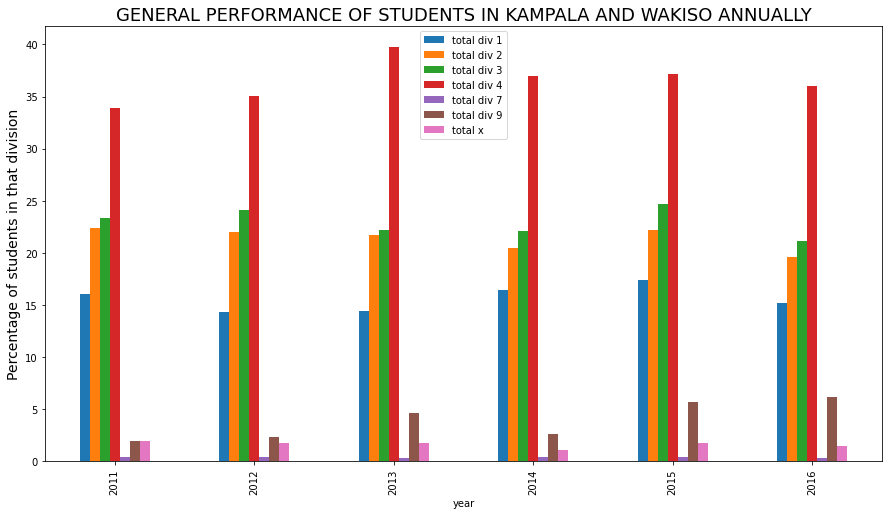

In [51]:
px = div_total.plot(kind='bar', figsize=(15,8))
plt.ylabel('Percentage of students in that division', fontsize=14)
px.set_title('GENERAL PERFORMANCE OF STUDENTS IN KAMPALA AND WAKISO ANNUALLY', fontsize=18)

From above, we see that most of the students lie under division four. The next wave of students lies under divion three, then two and one and that is consistent for all the years.

## 11. Comparing the performance between girls and boys in Kampala and Wakiso annually.<a name="eleven"></a>
The procedure used here is similar to that used in objective five.

In [52]:
kla_wakiso['male_scores'] = kla_wakiso.apply(male_scores, axis = 1)
kla_wakiso['female_scores'] = kla_wakiso.apply(female_scores, axis = 1)
kla_wakiso_gender_avg_by_year = kla_wakiso.groupby('year')[['male_scores', 'female_scores']].mean()
kla_wakiso_gender_avg_by_year

,male_scores,female_scores
year,,
2011,41.809075,37.624892
2012,37.227069,34.358076
2013,38.984565,35.895296
2014,39.974579,37.006236
2015,39.956416,37.485406
2016,38.871956,35.439605


Text(0.5, 1.0, 'Performance comparison between girls and boys from Kampala and Wakiso in UCE 2011-2016')

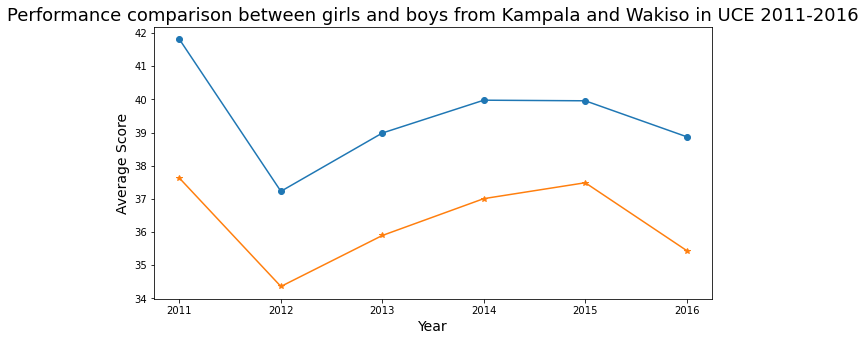

In [53]:
f, ax = plt.subplots(figsize=(10,5))
kla_wakiso_gender_avg_by_year['male_scores'].plot(marker = 'o')

kla_wakiso_gender_avg_by_year['female_scores'].plot(marker = '*')


plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Score', fontsize=14)

plt.title('Performance comparison between girls and boys from Kampala and Wakiso in UCE 2011-2016', fontsize=18)

As expected from above, we see that the boys still performed better than the girls over the years.

## 12. Studying the performance of students outside of Kampala and Wakiso through the years.<a name="twelve"></a>
We borrow the same procedure from objective ten. Although, this time round, we shall be focusing on all districts with Kampala and Wakiso excluded.

In [54]:
outside_kla = df[df.district != 'KAMPALA']
outside = outside_kla[outside_kla.district != 'WAKISO']
outside

,year,district,school,total candidates,total div 1,% div 1,total div 2,% div 2,total div 3,% div 3,total div 4,% div 4,total div 7,% div 7,total div 9,% div 9,total x,% x,female candidates,female total div1,female % div1,female total div2,female % div2,female total div3,...,female total div7,female % div7,female total div9,female % div9,female total x,female % x,male candidates,male total div1,male % div1,male total div2,male % div2,male total div3,male % div3,male total div4,male % div4,male total div7,male % div7,male total div9,male % div9,male total x,male % x,score,male_scores,female_scores
1,2011,MUKONO,NAMILYANGO COLLEGE,151.0,150.0,99.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.7,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,151,150.0,99.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.7,99.3,99.300000,0.000000
2,2011,MUKONO,"MT.ST.MARY'S,NAMAGUNGA",153.0,151.0,98.7,2.0,1.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153,151.0,98.7,2.0,1.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.4,0.000000,99.350000
4,2011,BUSHENYI MAIN,KITABI SEMINARY,73.0,71.0,97.3,2.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,73,71.0,97.3,2.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.6,98.650000,0.000000
5,2011,MASAKA MAIN,"ST.HENRY'S COLLEGE,KITOVU",164.0,159.0,97.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,164,159.0,97.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.5,98.500000,0.000000
7,2011,KIBAALE,"NOTRE DAME ACADEMY,BUSEESA",25.0,24.0,96.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,24.0,96.0,1.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0,0.000000,98.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17634,2016,ZOMBO,PAIDHA SECONDARY SCHOOL P.O.BOX 117 PAIDHA,148.0,0.0,0.0,12.0,8.1,30.0,20.3,85.0,57.4,1.0,0.7,15.0,10.1,5.0,3.4,44,0.0,0.0,0.0,0.0,5.0,...,1.0,2.3,5.0,11.4,1.0,2.3,104,0.0,0.0,12.0,11.5,25.0,24.0,53.0,51.0,0.0,0.0,10.0,9.6,4.0,3.8,26.3,27.460000,23.575000
17635,2016,ZOMBO,PAKADHA SEED SECONDARY SCHOOL P.O.BOX 143 P...,68.0,0.0,0.0,2.0,2.9,11.0,16.2,50.0,73.5,0.0,0.0,5.0,7.4,0.0,0.0,28,0.0,0.0,1.0,3.6,4.0,...,0.0,0.0,2.0,7.1,0.0,0.0,40,0.0,0.0,1.0,2.5,7.0,17.5,29.0,72.5,0.0,0.0,3.0,7.5,0.0,0.0,26.0,25.958333,26.026667
17636,2016,ZOMBO,"CHARITY COLLEGE,PAIDHA P.O.BOX 47 PAIDHA",128.0,0.0,0.0,4.0,3.1,6.0,4.7,71.0,55.5,1.0,0.8,36.0,28.1,10.0,7.8,24,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,20.8,2.0,8.3,104,0.0,0.0,4.0,3.8,6.0,5.8,54.0,51.9,1.0,1.0,31.0,29.8,8.0,7.7,20.0,19.988333,19.780000
17637,2016,ZOMBO,NEGRINI MEM. SECONDARY SCHOOL P.O.BOX 156 P...,45.0,0.0,0.0,1.0,2.2,2.0,4.4,26.0,57.8,0.0,0.0,14.0,31.1,2.0,4.4,14,0.0,0.0,1.0,7.1,0.0,...,0.0,0.0,5.0,35.7,1.0,7.1,31,0.0,0.0,0.0,0.0,2.0,6.5,19.0,61.3,0.0,0.0,9.0,29.0,1.0,3.2,20.1,20.391667,19.620000


In [55]:
n = outside.groupby('year')[['total div 1', 'total div 2', 'total div 3', 'total div 4', 'total div 7', 'total div 9', 'total x']].sum()
n.reset_index(inplace = True)
n

,year,total div 1,total div 2,total div 3,total div 4,total div 7,total div 9,total x
0,2011,15218.0,38116.0,56888.0,99832.0,960.0,9000.0,5400.0
1,2012,12192.0,33138.0,55393.0,103425.0,792.0,11198.0,5068.0
2,2013,12820.0,32840.0,48969.0,119728.0,1075.0,20347.0,5794.0
3,2014,14644.0,34210.0,51749.0,119372.0,859.0,16679.0,3431.0
4,2015,16173.0,35244.0,54002.0,102076.0,1141.0,22361.0,5340.0
5,2016,15271.0,33709.0,51661.0,123058.0,772.0,37123.0,5723.0


In [56]:
s = outside.groupby('year')['total candidates'].sum()
s

year
2011    225414.0
2012    221206.0
2013    243995.0
2014    240944.0
2015    241133.0
2016    267317.0
Name: total candidates, dtype: float64

In [57]:
for ind in n.index:
    if n.loc[ind, 'year'] == s.index[ind]:
        n.loc[ind, 'total div 1'] = (n.loc[ind, 'total div 1']/s[s.index[ind]])*100
        n.loc[ind, 'total div 2'] = (n.loc[ind, 'total div 2']/s[s.index[ind]])*100
        n.loc[ind, 'total div 3'] = (n.loc[ind, 'total div 3']/s[s.index[ind]])*100
        n.loc[ind, 'total div 4'] = (n.loc[ind, 'total div 4']/s[s.index[ind]])*100
        n.loc[ind, 'total div 7'] = (n.loc[ind, 'total div 7']/s[s.index[ind]])*100
        n.loc[ind, 'total div 9'] = (n.loc[ind, 'total div 9']/s[s.index[ind]])*100
        n.loc[ind, 'total x'] = (n.loc[ind, 'total x']/s[s.index[ind]])*100
n

,year,total div 1,total div 2,total div 3,total div 4,total div 7,total div 9,total x
0,2011,6.751133,16.909331,25.237119,44.288287,0.425883,3.992654,2.395592
1,2012,5.511605,14.980606,25.041364,46.755061,0.358037,5.062250,2.291077
2,2013,5.254206,13.459292,20.069674,49.069858,0.440583,8.339105,2.374639
3,2014,6.077761,14.198320,21.477605,49.543462,0.356514,6.922355,1.423982
4,2015,6.707087,14.616000,22.395110,42.331825,0.473183,9.273306,2.214545
5,2016,5.712693,12.610122,19.325744,46.034483,0.288796,13.887257,2.140904


In [58]:
n.set_index(['year'] , inplace = True)

Text(0.5, 1.0, 'GENERAL PERFORMANCE OF STUDENTS OUTSIDE KAMPALA AND WAKISO ANNUALLY')

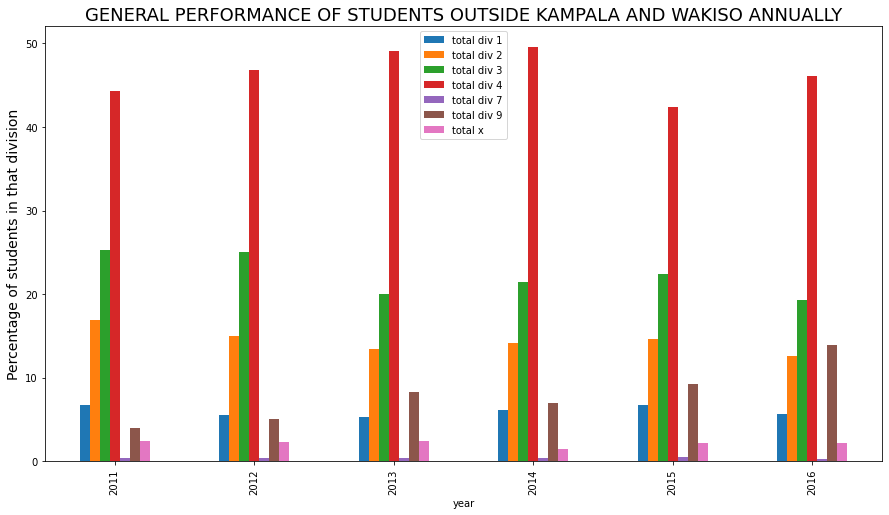

In [59]:
nx = n.plot(kind='bar', figsize=(15,8))
plt.ylabel('Percentage of students in that division', fontsize=14)
nx.set_title('GENERAL PERFORMANCE OF STUDENTS OUTSIDE KAMPALA AND WAKISO ANNUALLY', fontsize=18)